# Tarea 4
## Especialidad en Estadistica Aplicada y Ciencia de Datos
### Mateo Orozco Baldovino

### La informacion de la tarea puede ser encontrada en el siguiente repositorio:
https://github.com/TheMaorba/DataMining/tree/main/Tarea4


In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r"D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\bank.csv", sep=";")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# data = data.drop(columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'])
columnas_numericas = [
    'age', 'balance', 'campaign', 'duration']

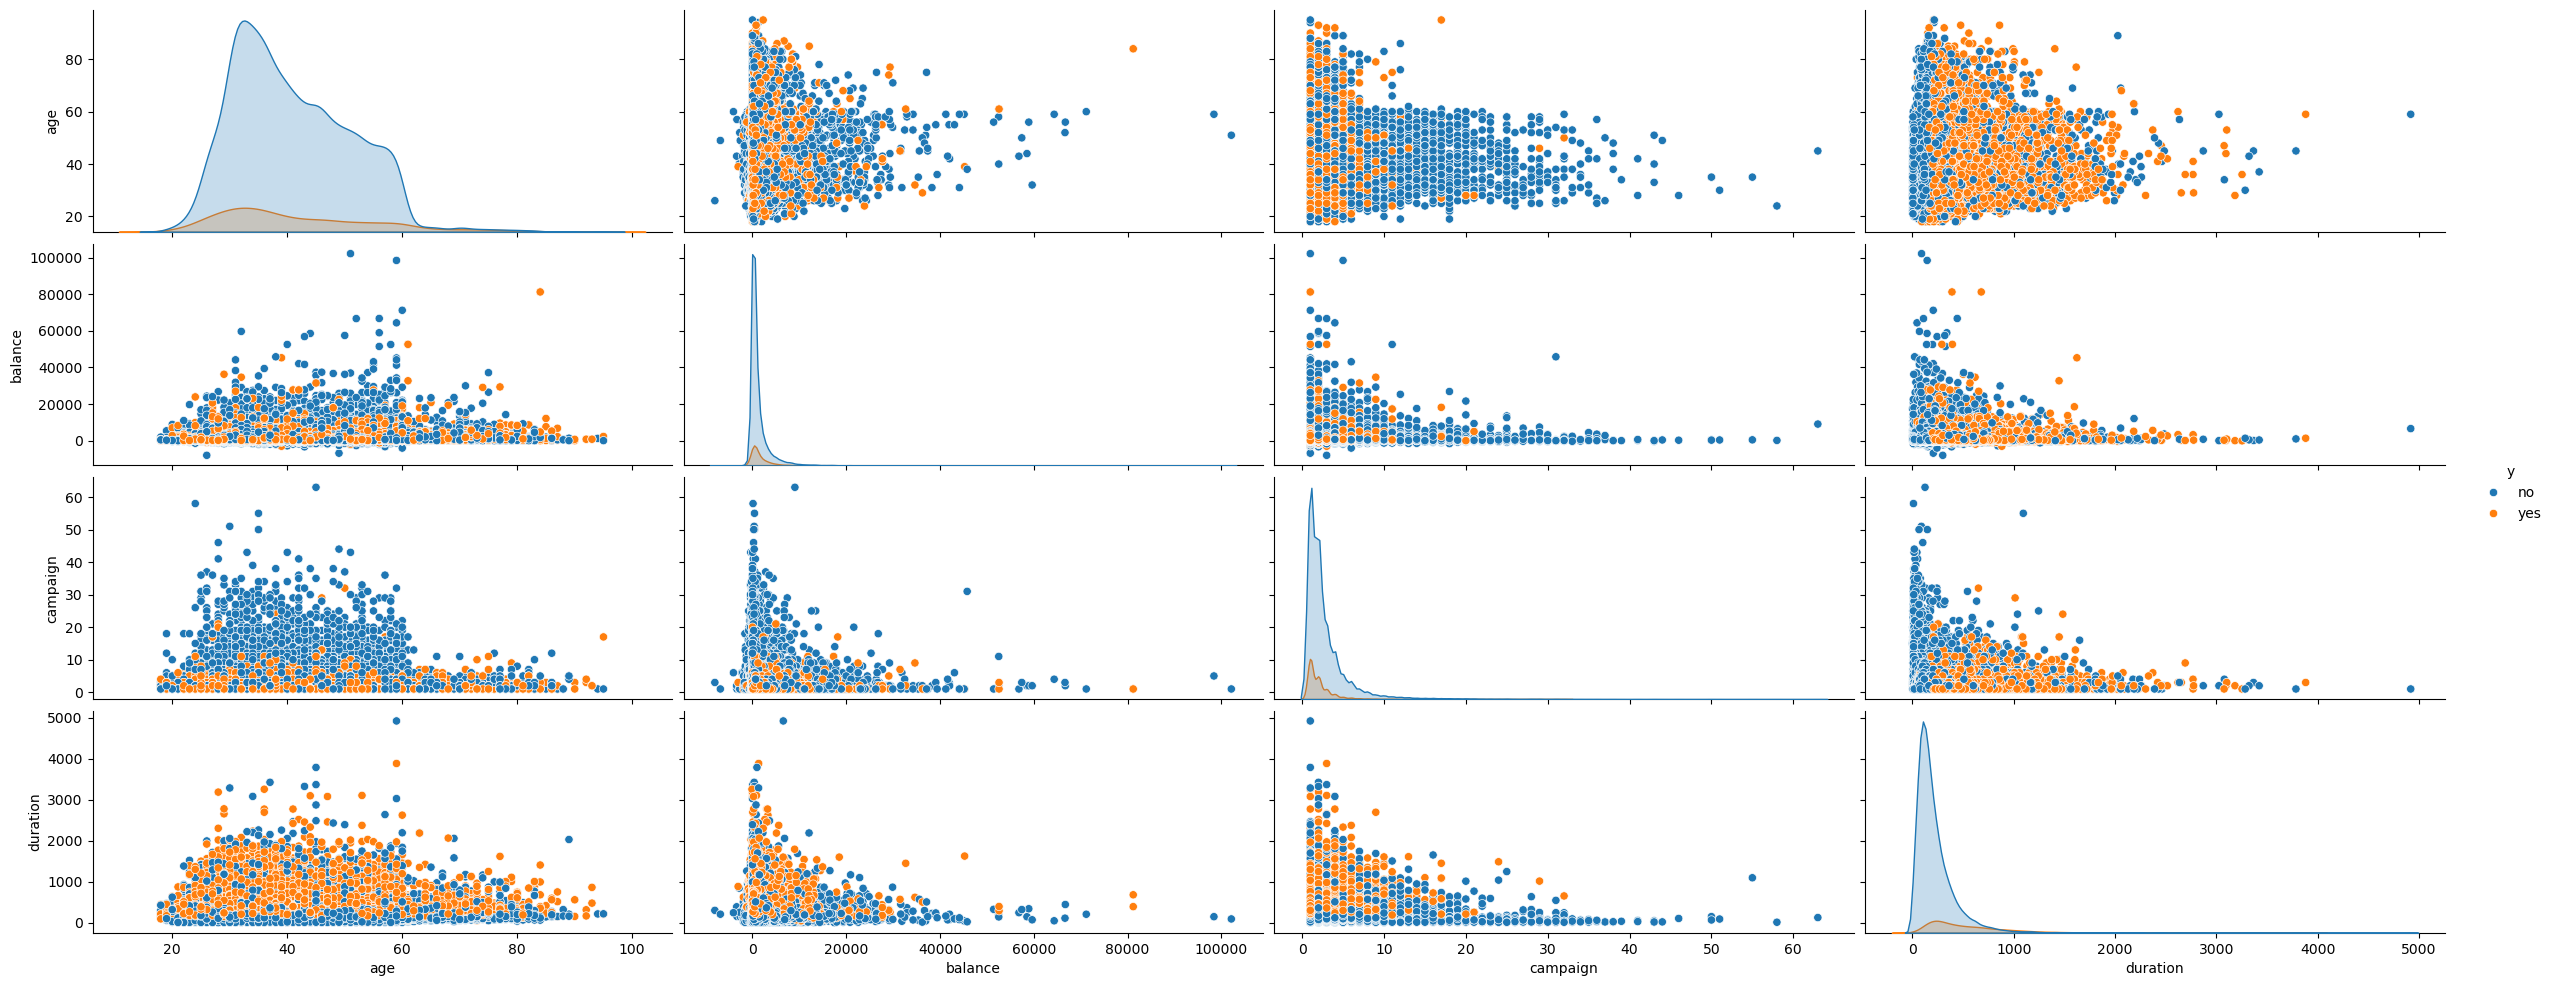

In [5]:
sns.pairplot(
    data[columnas_numericas + ['y']],
    hue='y',
    aspect=2.5
)

plt.show()

La gráfica muestra una matriz de dispersión entre las variables edad, balance, campaña y duración, con puntos codificados por color según la variable binaria "y" (naranja para "sí" y azul para "no"). Se observan distribuciones sesgadas en las diagonales, especialmente en balance y duración, mientras que los gráficos cruzados revelan que los casos positivos ("sí") tienden a concentrarse en valores más altos de duración y edad. Este análisis sugiere que la duración de la interacción y la edad podrían estar asociadas con una mayor probabilidad de respuesta afirmativa.

Columnas seleccionadas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


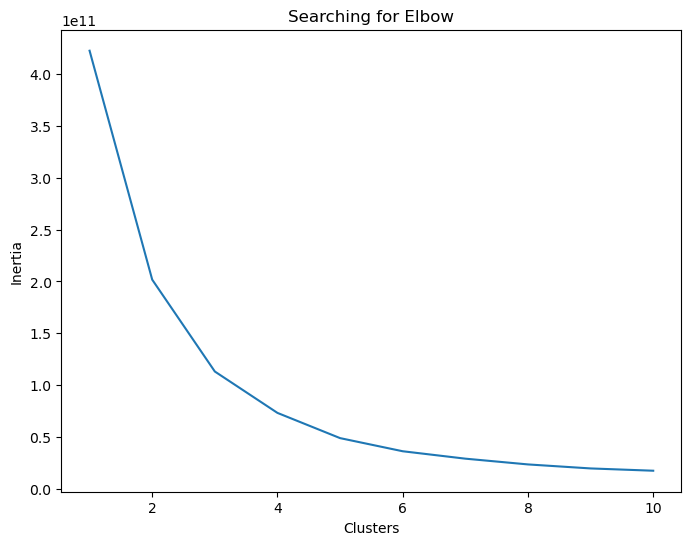

In [6]:
from sklearn.cluster import KMeans
# Seleccionar solo columnas numéricas
X_numeric = data.select_dtypes(include=['int64', 'float64'])

print(f"Columnas seleccionadas: {list(X_numeric.columns)}")
# Mostrará: age, balance, day, duration, campaign, pdays, previous

# Aplicar K-Means
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42).fit(X_numeric)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()


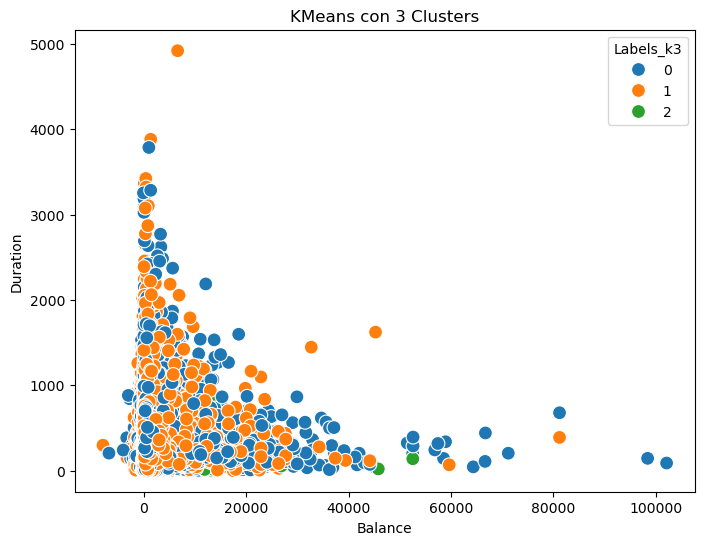

In [7]:
# Primero prepara tus datos (usa el que prefieras)
X_numeric = data.select_dtypes(include=['int64', 'float64'])

# Escalar los datos (recomendado)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Aplicar KMeans con 3 clusters
km3 = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

# Crear DataFrame con las etiquetas
X_plot = X_numeric.copy()
X_plot['Labels_k3'] = km3.labels_

# Visualizar usando 2 variables de tu dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_plot['balance'],      # Cambia por la variable que quieras en X
    y=X_plot['duration'],     # Cambia por la variable que quieras en Y
    hue=X_plot['Labels_k3'], 
    palette=sns.color_palette('tab10', 3), 
    s=100
)
plt.title('KMeans con 3 Clusters')
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.show()

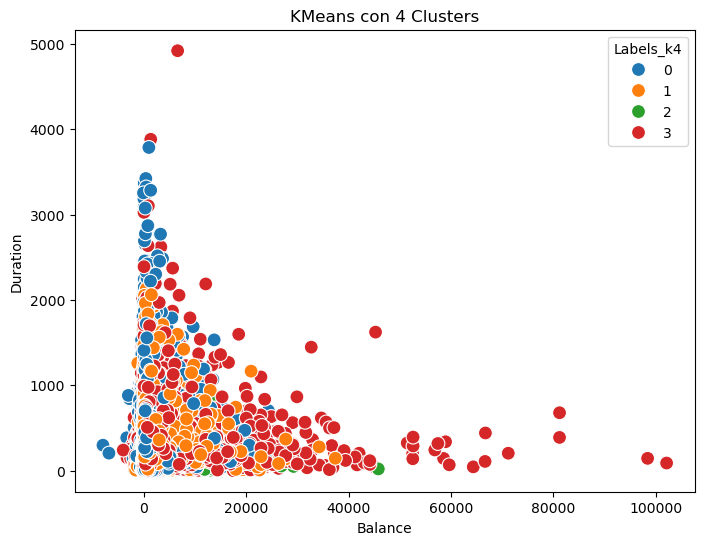

In [8]:
# Preparar datos
X_numeric = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Aplicar KMeans con 4 clusters
km4 = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

# Crear copia con etiquetas
X_plot = X_numeric.copy()
X_plot['Labels_k4'] = km4.labels_

# Visualizar
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=X_plot,
    x='balance',      # Elige la variable que prefieras
    y='duration',     # Elige la variable que prefieras
    hue='Labels_k4',
    palette=sns.color_palette('tab10', 4),
    s=100
)
plt.title('KMeans con 4 Clusters')
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.show()

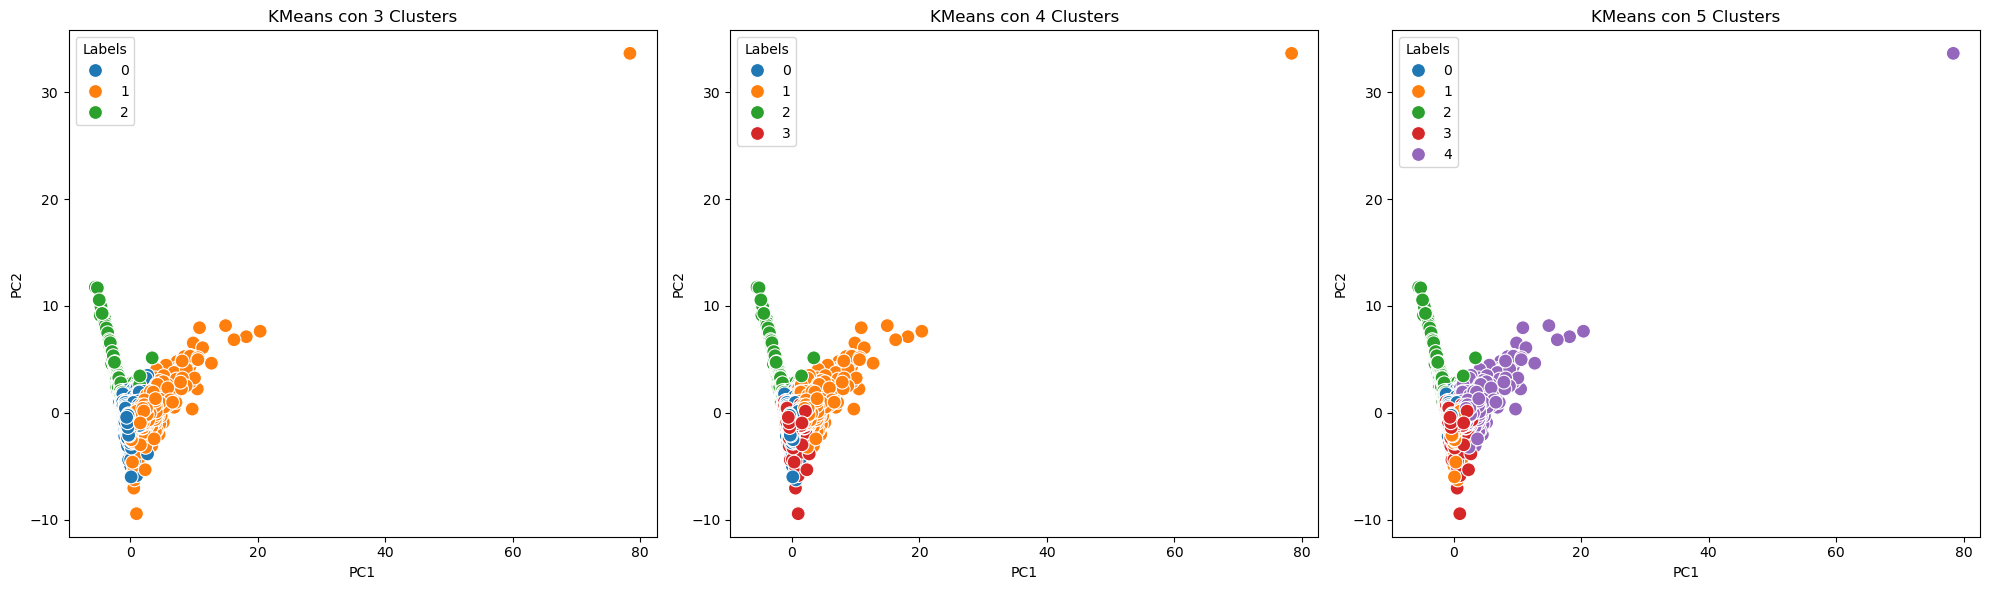

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparar datos
X_numeric = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Reducir dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar KMeans con 3, 4 y 5 clusters
km3 = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
km4 = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
km5 = KMeans(n_clusters=5, random_state=42).fit(X_scaled)

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot con 3 clusters
X_plot3 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_plot3['Labels'] = km3.labels_
sns.scatterplot(
    data=X_plot3,
    x='PC1', y='PC2', 
    hue='Labels',
    palette=sns.color_palette('tab10', 3),
    s=100,
    ax=axes[0]
)
axes[0].set_title('KMeans con 3 Clusters')

# Plot con 4 clusters
X_plot4 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_plot4['Labels'] = km4.labels_
sns.scatterplot(
    data=X_plot4,
    x='PC1', y='PC2', 
    hue='Labels',
    palette=sns.color_palette('tab10', 4),
    s=100,
    ax=axes[1]
)
axes[1].set_title('KMeans con 4 Clusters')

# Plot con 5 clusters
X_plot5 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_plot5['Labels'] = km5.labels_
sns.scatterplot(
    data=X_plot5,
    x='PC1', y='PC2', 
    hue='Labels',
    palette=sns.color_palette('tab10', 5),
    s=100,
    ax=axes[2]
)
axes[2].set_title('KMeans con 5 Clusters')

plt.tight_layout()
plt.show()

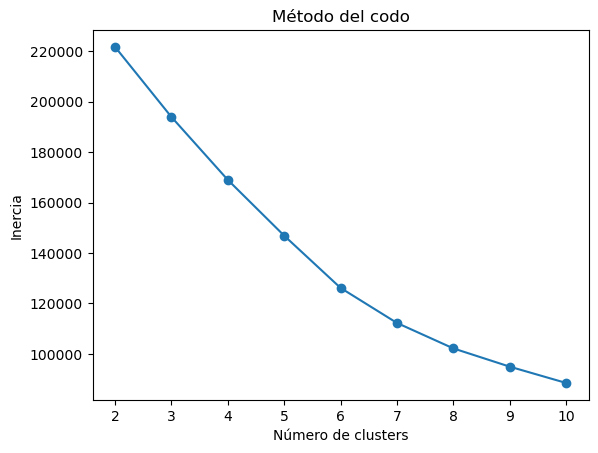

,age,balance,duration,campaign,pdays,previous
cluster_kmeans,,,,,,
0,34.138074,920.397155,273.204858,2.287002,2.506127,0.069934
1,39.367963,1348.479602,257.577324,2.116540,261.547596,3.546964
2,52.493297,2102.188234,246.560395,2.431201,7.353615,0.150448
3,40.245732,1076.596341,152.701829,14.823780,0.135366,0.025610


In [10]:
from sklearn.preprocessing import StandardScaler

features = data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Proporción de 'y' por cluster
pd.crosstab(data['cluster_kmeans'], data['y'], normalize='index')


data.groupby('cluster_kmeans')[features.columns].mean()



In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=10)
data['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

data['cluster_dbscan'].value_counts()

pd.crosstab(data['cluster_dbscan'], data['y'], normalize='index')



y,no,yes
cluster_dbscan,,
-1,0.679549,0.320451
0,0.891740,0.108260
1,1.000000,0.000000


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors

# Variable de interés (solo para análisis posterior)
y = data["y"].copy()

X = data.drop(columns=["y"])

num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

X_proc = preprocess.fit_transform(X)

def cluster_report(Xmat, labels, sample_sil=5000, seed=42):
    # Manejo de ruido en DBSCAN: silhouette requiere al menos 2 clusters (sin contar -1)
    unique = set(labels)
    n_noise = np.sum(labels == -1)
    n = len(labels)
    n_clusters = len(unique) - (1 if -1 in unique else 0)

    out = {
        "n_clusters": n_clusters,
        "noise_pct": n_noise / n * 100.0
    }

    # Métricas internas: si hay >=2 clusters reales
    if n_clusters >= 2:
        # Silhouette puede ser costoso; usar muestra si X es grande
        out["silhouette"] = silhouette_score(Xmat, labels, sample_size=min(sample_sil, n), random_state=seed)
        # Para DB/CH a veces conviene densificar; si revienta memoria, omite estas dos o usa PCA antes
        Xdense = Xmat.toarray() if hasattr(Xmat, "toarray") else Xmat
        out["davies_bouldin"] = davies_bouldin_score(Xdense, labels)
        out["calinski_harabasz"] = calinski_harabasz_score(Xdense, labels)
    else:
        out["silhouette"] = np.nan
        out["davies_bouldin"] = np.nan
        out["calinski_harabasz"] = np.nan

    return out

# 2) K-means: probar varios k
ks = [2,3,4,5,6,7,8]
kmeans_rows = []
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_proc)
    rep = cluster_report(X_proc, labels)
    rep["k"] = k
    rep["inertia"] = km.inertia_
    kmeans_rows.append(rep)

kmeans_results = pd.DataFrame(kmeans_rows).sort_values("silhouette", ascending=False)
kmeans_results


,n_clusters,noise_pct,silhouette,davies_bouldin,calinski_harabasz,k,inertia
0,2,0.0,0.238099,1.868259,6343.166289,2,479278.686525
4,6,0.0,0.154571,1.701934,4589.714274,6,362499.992811
2,4,0.0,0.154432,1.898448,5364.229126,4,403048.724470
3,5,0.0,0.154307,1.743974,4845.810225,5,382512.844848
1,3,0.0,0.144502,2.185756,6004.651235,3,431815.368530
6,8,0.0,0.122571,1.780206,4070.797536,8,335210.987603
5,7,0.0,0.116438,1.836601,4355.782114,7,346307.456765


La tabla muestra los resultados de distintas configuraciones del algoritmo k-means, evaluadas con métricas como silhouette, Davies-Bouldin, Calinski-Harabasz e inercia. El modelo con 2 clusters presenta el mayor puntaje de silhouette (0.224), lo que indica mejor cohesión interna, aunque su inercia es la más alta. En contraste, el modelo con 8 clusters tiene la menor inercia (327,663), lo que sugiere mejor compactación, pero su silhouette es más baja. Estos resultados reflejan el clásico compromiso entre simplicidad del modelo y calidad del agrupamiento, donde el número óptimo de clusters dependerá del objetivo analítico.

In [ ]:
# !jupyter nbconvert --to html "Tarea4.ipynb"
# !jupyter nbconvert --to slides "Tarea4.ipynb"

[NbConvertApp] Converting notebook Tarea4.ipynb to slides
[NbConvertApp] Writing 1653071 bytes to Tarea4.slides.html
